<a href="https://colab.research.google.com/github/RuanRodrigues10000/ML_RUAN/blob/master/logistic_ofc_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importar bibliotecas

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [63]:
df = pd.read_csv('/content/titanic_train.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PLOTS


<Axes: >

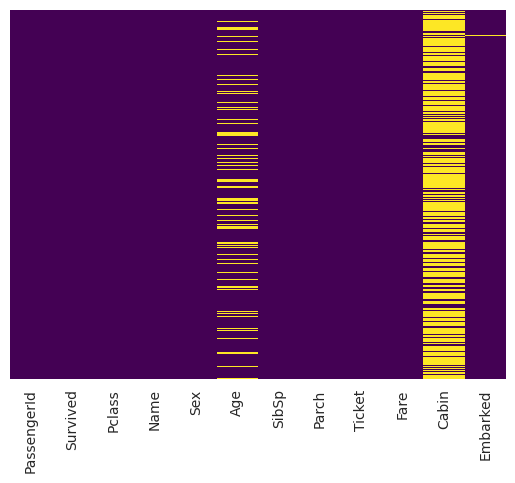

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

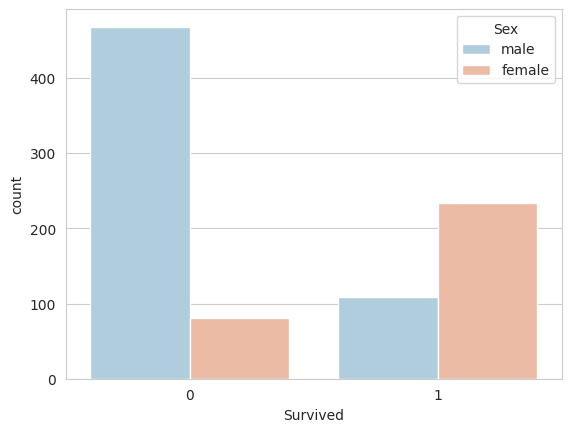

In [68]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df,palette="RdBu_r")

In [69]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
      if Pclass == 1:
         return 37

      elif Pclass == 2:
        return 29

      else:
        return 22



    else:
       return Age

In [70]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

<Axes: >

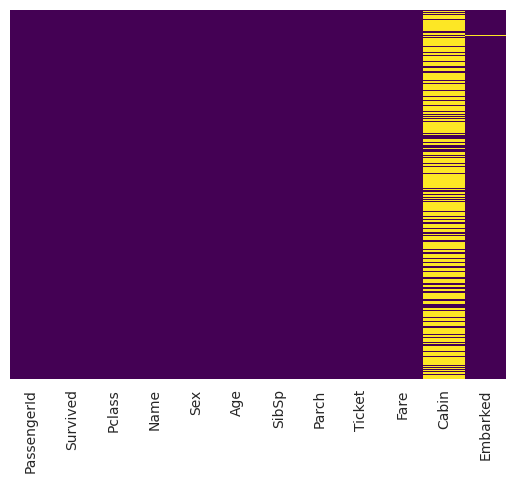

In [71]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [72]:
sex= pd.get_dummies(df["Sex"],drop_first=True)
embarked=pd.get_dummies(df["Embarked"],drop_first=True)

In [73]:
df.drop(["Sex","Embarked","Name","Ticket"], axis=1,inplace=True)

In [74]:
df.drop('Cabin',axis=1,inplace=True)

### Training linear regression model

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis=1), df["Survived"], test_size=0.3,random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logm = LogisticRegression()

In [79]:
logm.fit(X_train,y_train)

LogisticRegression()

##PREDIÇÃO

In [80]:
pred = logm.predict(X_test)

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.76       154
           1       0.72      0.46      0.56       114

    accuracy                           0.69       268
   macro avg       0.70      0.66      0.66       268
weighted avg       0.70      0.69      0.68       268



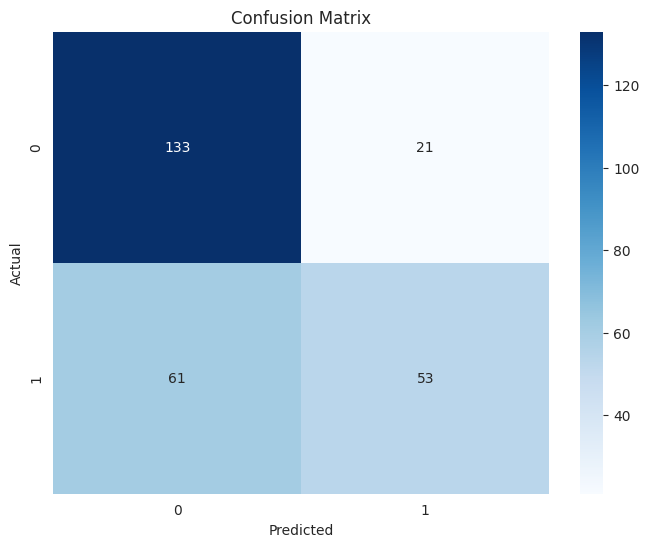

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule a matriz de confusão
cm = confusion_matrix(y_test, pred)  # Substitua y_test e predictions pelos seus valores reais e previstos

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
 # Se você estiver usando matplotlib para plotar